<class 'numpy.ndarray'>


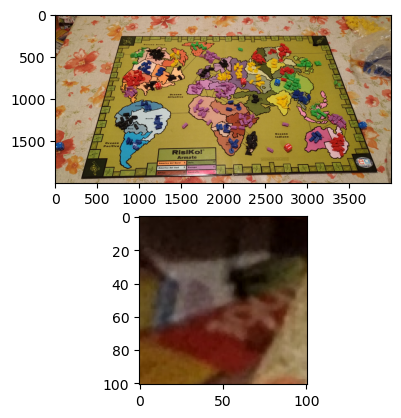

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import PIL
from PIL import Image

def create_cropped_image_from_coordinates(image, coordinates):

    #trova le coordinate minime e massime
    min_x = np.min(coordinates[:, 0])
    max_x = np.max(coordinates[:, 0])
    min_y = np.min(coordinates[:, 1])
    max_y = np.max(coordinates[:, 1])
    
    cropped_image = image[min_y:max_y+1, min_x:max_x+1]
    return cropped_image

image_path = "real_images/images/000000.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
print(type(image))
#image = Image.open(image_path)

# efinisci le coordinate dei vertici
coordinates = np.array([
    [100, 100],
    [200, 100],
    [100, 200],
    [200, 200]
])
cropped_image = create_cropped_image_from_coordinates(image, coordinates)
f, axarr = plt.subplots(2,1)
axarr[0].imshow(image)
axarr[1].imshow(cropped_image)

#plt.imshow(cropped_image)
#plt.imshow(image_np)


In [14]:
import torch
import numpy as np
import torchvision.transforms.functional as TF

def prediction(a):
    return torch.tensor(0.5)
     
def estrai_finestre_e_prob_predictions(img, window_height, window_width):
    height, width, _ = img.shape
    finestre = []
    finestre_coordinate = []
    
    #iteriamo lungo l'asse verticale con un passo di window_height
    for i in range(0, height, window_height):
        for j in range(0, width, window_width):                     
            window = img[i:i+window_height, j:j+window_width]
            finestre.append(window)
            
            #coordinates of the box
            top_left = np.array((i, j))
            top_right = np.array((i, j + window_width - 1))
            bottom_left = np.array((i + window_height - 1, j))
            bottom_right = np.array((i + window_height - 1, j + window_width - 1))
            
            # coordinate = [top_left, top_right, bottom_left, bottom_right]
            # coordinate = np.array( coordinate)
            coordinate = np.array([top_left, top_right, bottom_left, bottom_right])
            finestre_coordinate.append(coordinate)
    
    max_idx_width =  int(width/window_width)
    prob_list = [] 
    for idx, (window, curr_coordinates) in enumerate(zip(finestre, finestre_coordinate), 1):
        
        prec_coordinates = np.zeros((4, 2), dtype=int)
        prob_prec = torch.tensor(0)
        
        prob = prediction(window) #fate finta che facciamo l inference della rete sulla window corrente
        
        if torch.max(prob) < 0.81 and torch.max(prob_prec) < 0.81 and idx % max_idx_width != 0:#controlliamo che nonandiaom outof index

            new_coordinates = ((curr_coordinates + prec_coordinates) / 2).astype(int)
            new_window = create_cropped_image_from_coordinates(img, new_coordinates)
            prob_new = prediction(new_window)
            
            if torch.max(prob_new) < 0.81 and (len(finestre) - idx) > max_idx_width :
                new_new_coordinates = new_coordinates.copy()
                new_new_coordinates[:, 0] = new_coordinates[:, 0] + (window_height / 2)
                new_new_window  =create_cropped_image_from_coordinates(img, new_new_coordinates)
                prob_new_new = prediction(new_new_window)
                
                prob_list.append(prob_new_new)  
            else:
                prob_list.append(prob_new)  
        else:
            prob_list.append(prob) 
                
                
            prec_coordinates = curr_coordinates
            prob_prec = prob
            
            
    print(len(finestre))
    return prob_list
    
#int main():
window_height, window_width= 20, 30
prob = []

#if window_height* window_width > (300*200): #per i cluster piu grandi, quelli con probabilita piu altadi avere piu tanks
prob = estrai_finestre_e_prob_predictions(image, window_height, window_width)
    
list_size = len(prob)
print(prob)


13400
[tensor(0.5000), tensor(0.5000), tensor(0.5000), tensor(0.5000), tensor(0.5000), tensor(0.5000), tensor(0.5000), tensor(0.5000), tensor(0.5000), tensor(0.5000), tensor(0.5000), tensor(0.5000), tensor(0.5000), tensor(0.5000), tensor(0.5000), tensor(0.5000), tensor(0.5000), tensor(0.5000), tensor(0.5000), tensor(0.5000), tensor(0.5000), tensor(0.5000), tensor(0.5000), tensor(0.5000), tensor(0.5000), tensor(0.5000), tensor(0.5000), tensor(0.5000), tensor(0.5000), tensor(0.5000), tensor(0.5000), tensor(0.5000), tensor(0.5000), tensor(0.5000), tensor(0.5000), tensor(0.5000), tensor(0.5000), tensor(0.5000), tensor(0.5000), tensor(0.5000), tensor(0.5000), tensor(0.5000), tensor(0.5000), tensor(0.5000), tensor(0.5000), tensor(0.5000), tensor(0.5000), tensor(0.5000), tensor(0.5000), tensor(0.5000), tensor(0.5000), tensor(0.5000), tensor(0.5000), tensor(0.5000), tensor(0.5000), tensor(0.5000), tensor(0.5000), tensor(0.5000), tensor(0.5000), tensor(0.5000), tensor(0.5000), tensor(0.5000), t